<a href="https://colab.research.google.com/github/Chen-Wi-Ki/Colab-DogCat-CNN/blob/main/DogCatCNNAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN經典範例--貓狗二值問題

範例及圖像來源:https://www.kaggle.com/code/uysimty/keras-cnn-dog-or-cat-classification/notebook

目前判斷能力並不准確,因為數據量過少(只有使用各100張貓狗圖片做訓練)。

本研究只是使我去理解CNN處理二值問題時的整套過程。

也用於未來解釋給人聽得一個小範例。

In [3]:
#使Colab可以讀取雲端硬碟資料
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [4]:
#自訂義雲端路徑
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/DogByCat_Data/train

cat.0.jpg   cat.41.jpg	cat.72.jpg  dog.12.jpg	dog.43.jpg  dog.74.jpg
cat.10.jpg  cat.42.jpg	cat.73.jpg  dog.13.jpg	dog.44.jpg  dog.75.jpg
cat.11.jpg  cat.43.jpg	cat.74.jpg  dog.14.jpg	dog.45.jpg  dog.76.jpg
cat.12.jpg  cat.44.jpg	cat.75.jpg  dog.15.jpg	dog.46.jpg  dog.77.jpg
cat.13.jpg  cat.45.jpg	cat.76.jpg  dog.16.jpg	dog.47.jpg  dog.78.jpg
cat.14.jpg  cat.46.jpg	cat.77.jpg  dog.17.jpg	dog.48.jpg  dog.79.jpg
cat.15.jpg  cat.47.jpg	cat.78.jpg  dog.18.jpg	dog.49.jpg  dog.7.jpg
cat.16.jpg  cat.48.jpg	cat.79.jpg  dog.19.jpg	dog.4.jpg   dog.80.jpg
cat.17.jpg  cat.49.jpg	cat.7.jpg   dog.1.jpg	dog.50.jpg  dog.81.jpg
cat.18.jpg  cat.4.jpg	cat.80.jpg  dog.20.jpg	dog.51.jpg  dog.82.jpg
cat.19.jpg  cat.50.jpg	cat.81.jpg  dog.21.jpg	dog.52.jpg  dog.83.jpg
cat.1.jpg   cat.51.jpg	cat.82.jpg  dog.22.jpg	dog.53.jpg  dog.84.jpg
cat.20.jpg  cat.52.jpg	cat.83.jpg  dog.23.jpg	dog.54.jpg  dog.85.jpg
cat.21.jpg  cat.53.jpg	cat.84.jpg  dog.24.jpg	dog.55.jpg  dog.86.jpg
cat.22.jpg  cat.54.jpg	cat.85.jpg  do

In [5]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [10]:
#依名稱設定成:Dog=0,Cat=1
train_dir = "gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/DogByCat_Data/train"
path = os.path.join(train_dir)
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        print(category,end=',')#測試(若依字母順序開始,會從cat貓圖開始跑然後是dog狗)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)
#Normalize data
X = X/255.0

1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
#卷積設定
model = Sequential()
#用Conv2D添加一個密集連接層64unit
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
#用Conv2D添加一個密集連接層32unit
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#添加一個"softmax layer"
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
#訓練10次
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
7/7 [==============================] - 2s 302ms/step - loss: 0.5340 - accuracy: 0.7236
Epoch 2/10
7/7 [==============================] - 2s 294ms/step - loss: 0.4624 - accuracy: 0.8090
Epoch 3/10
7/7 [==============================] - 2s 297ms/step - loss: 0.3988 - accuracy: 0.8543
Epoch 4/10
7/7 [==============================] - 2s 298ms/step - loss: 0.3379 - accuracy: 0.8945
Epoch 5/10
7/7 [==============================] - 2s 306ms/step - loss: 0.2932 - accuracy: 0.9045
Epoch 6/10
7/7 [==============================] - 2s 300ms/step - loss: 0.2250 - accuracy: 0.9397
Epoch 7/10
7/7 [==============================] - 2s 299ms/step - loss: 0.1997 - accuracy: 0.9598
Epoch 8/10
7/7 [==============================] - 2s 302ms/step - loss: 0.1290 - accuracy: 0.9799
Epoch 9/10
7/7 [==============================] - 2s 311ms/step - loss: 0.1143 - accuracy: 0.9749
Epoch 10/10
7/7 [==============================] - 2s 300ms/step - loss: 0.0765 - accuracy: 0.9950


In [18]:
! ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/DogByCat_Data/test1

10.jpg	1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg  7.jpg  8.jpg	9.jpg


In [19]:
#測試
rain_dir = "gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/DogByCat_Data/test1"
path = os.path.join(rain_dir)
#os.listdir(path)
X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255
predictions = model.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})
print(submission_df)
submission_df.to_csv("gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/DogByCat_Data/WiKisubmission100.csv", index=False)

   id  label
0   4      0
1   8      1
2   9      0
3   5      1
4   3      1
5  10      1
6   2      1
7   7      1
8   6      1
9   1      1


In [20]:
#回讀上面Test的Excel結果(非必要)
from pandas import read_csv
df = read_csv('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/DogByCat_Data/WiKisubmission100.csv')
data = df.values
print(data)

[[ 4  0]
 [ 8  1]
 [ 9  0]
 [ 5  1]
 [ 3  1]
 [10  1]
 [ 2  1]
 [ 7  1]
 [ 6  1]
 [ 1  1]]


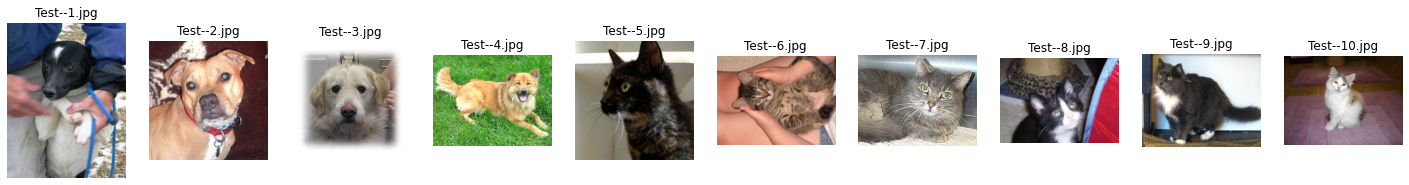

In [35]:
#讀圖片方法
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
for i in range(1,11,1):
  plt.subplot(1,10,i)
  plt.title('Test--%d.jpg' % i)
  img1=cv2.imread("gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/DogByCat_Data/test1/%d.jpg" % i)#自訂義
  cv2plt = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)#BGR轉換RGB
  #plt.imshow(img1)#BGR沒轉換直接用plt輸出的結果
  plt.imshow(cv2plt)#轉換RGB後用plt輸出的結果(一般習慣是用這個)
  plt.axis('off')

plt.show()